In [1]:
import pandas as pd


**Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.**

In [2]:
combats = pd.read_csv('/content/combats.csv')
pokemon = pd.read_csv('/content/pokemon.csv',index_col='pid')

pokemon

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...
796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True


In [ ]:
pokemon.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


We can see 800 pokemons with different stats.
Looks like dataset is balanced.
Min hp 1? Looks like wrong information, lets see

In [12]:
stat = 'HP'
pokemon[(pokemon[stat]<=pokemon[stat].quantile(.005)) | (pokemon[stat]>=pokemon[stat].quantile(.995))][stat]

pid
56      10
122    250
140     20
187     20
218    190
231     20
262    255
317      1
352    170
382     20
389     20
488     20
Name: HP, dtype: int64

Remember numbers 56 and 317, may be stats are wrong

In [64]:
stat = 'Defense'
pokemon[(pokemon[stat]<=pokemon[stat].quantile(.005)) | (pokemon[stat]>=pokemon[stat].quantile(.995))][stat]

pid
69      15
122      5
187     15
189     15
224    200
225    230
231    230
258     15
262     10
334    230
415    200
489      5
Name: Defense, dtype: int64

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       799 non-null    object
 1   Class 1    800 non-null    object
 2   Class 2    414 non-null    object
 3   HP         800 non-null    int64 
 4   Attack     800 non-null    int64 
 5   Defense    800 non-null    int64 
 6   Sp. Atk    800 non-null    int64 
 7   Sp. Def    800 non-null    int64 
 8   Speed      800 non-null    int64 
 9   Legendary  800 non-null    bool  
dtypes: bool(1), int64(6), object(3)
memory usage: 63.3+ KB


Name of one pokemon is not filled.
414 pokemons are double-classed.

In [ ]:
pokemon[pokemon.isna()['Name']]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
63,NaN,Fighting,NaN,65,105,60,60,70,95,False


Other information is correct.

Lets see, what are legendary and double-classsed pokemons

In [15]:
pokemon[pokemon['Legendary']==True].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615
std,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323
min,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000
25%,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000
50%,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000
75%,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000
max,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000


In [16]:
pokemon[pokemon['Legendary']==False].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782
std,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,54.500000,50.000000,45.000000,50.000000,45.000000
50%,65.000000,72.000000,66.000000,65.000000,65.000000,64.000000
75%,79.500000,95.000000,85.000000,85.000000,85.000000,85.000000
max,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000


In [18]:
pokemon[pokemon.isna()['Class 2']].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,67.766839,74.525907,67.585492,68.284974,67.974093,65.878238
std,28.043890,30.485008,28.330227,30.925913,27.190418,29.476263
min,10.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,52.000000,48.000000,45.000000,50.000000,45.000000
50%,65.000000,70.500000,63.000000,63.000000,65.000000,62.000000
75%,79.000000,95.000000,80.000000,87.750000,84.500000,86.500000
max,255.000000,180.000000,230.000000,194.000000,200.000000,180.000000


In [20]:
pokemon[~pokemon.isna()['Class 2']].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493
std,22.896557,33.698473,32.593788,33.805061,27.949961,28.521408
min,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000
25%,55.000000,59.250000,55.000000,50.000000,55.000000,50.000000
50%,70.000000,80.000000,75.500000,70.000000,75.000000,70.000000
75%,85.000000,103.000000,100.000000,100.000000,94.750000,91.000000
max,150.000000,190.000000,230.000000,180.000000,230.000000,160.000000


We can see, that double-class pokemons are little stronger, then single-class, and legendary are much stronger, than not-legendary.

In [51]:
classes = pokemon[pokemon['Legendary']==False][['Class 1','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
classes.groupby('Class 1',as_index = False).mean()

,Class 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
1,Dark,64.655172,86.862069,68.689655,70.620690,67.827586,73.689655
2,Dragon,72.650000,103.400000,78.150000,72.900000,77.400000,72.350000
3,Electric,57.325000,66.125000,65.425000,86.275000,72.325000,82.275000
4,Fairy,70.875000,57.187500,63.875000,75.250000,83.875000,45.437500
5,Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074
6,Fire,67.085106,82.191489,64.531915,86.000000,69.042553,73.276596
7,Flying,62.500000,50.000000,57.500000,71.000000,60.000000,89.000000
8,Ghost,58.733333,71.366667,79.266667,77.300000,74.233333,62.633333
9,Grass,65.940299,72.119403,70.283582,76.343284,69.044776,59.701493


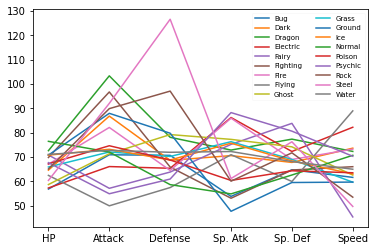

In [63]:
import matplotlib.pyplot as plt
fig, subplot = plt.subplots()
x = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
for course_title,data in classes.groupby('Class 1'):
  subplot.plot(x,data.mean(), label=course_title)
subplot.legend(framealpha=0.1,fontsize=7,ncol=2)

Looks like steel pokemon defense is too high

In [72]:
pokemon['AD ratio'] = pokemon['Attack']/pokemon['Defense']
pokemon

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,AD relation,AD ratio
pid,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000,1.000000
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127,0.984127
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952,0.987952
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008,0.813008
5,Charmander,Fire,NaN,39,52,43,60,50,65,False,1.209302,1.209302
...,...,...,...,...,...,...,...,...,...,...,...,...
796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,0.666667,0.666667
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,1.454545,1.454545
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,1.833333,1.833333


**visualize the relation between these two variables using an appropriate plot;**

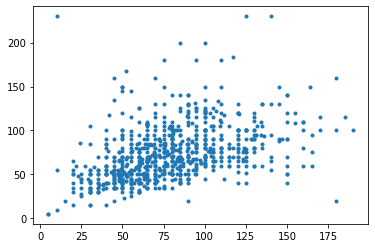

In [71]:
fig, subplot = plt.subplots()
x = pokemon['Attack'].values
y = pokemon['Defense'].values
subplot.scatter(x,y,marker = '.')

We can see here heteroskedastic regression

**list the names of the 3 Pokémon with highest attack-over-defense ratio;**

In [80]:
print(pokemon.sort_values('AD ratio',ascending=False)['Name'].head(3).values)

['DeoxysAttack Forme' 'Carvanha' 'Mega Beedrill']


**list the names of the 3 Pokémon with lowest attack-over-defense ratio;**

In [84]:
print(pokemon.sort_values('AD ratio')['Name'].head(3).values)

['Shuckle' 'Magikarp' 'Bronzor']


**list the names of the 10 Pokémon with the largest number of victories.**

In [99]:
combats['Cnt'] = 1
wincount = combats[['Winner', 'Cnt']].groupby('Winner',as_index = False).count()
wincount

,Winner,Count
0,1,37
1,2,46
2,3,89
3,4,70
4,5,55
...,...,...
778,796,39
779,797,116
780,798,60
781,799,89


In [116]:
winners = pd.merge(how='inner',left=pokemon, right=wincount, left_on='pid', right_on='Winner')
winners[['Name','Cnt']].sort_values('Cnt',ascending=False)['Name'].head(10).values


array(['Mewtwo', 'Aerodactyl', 'Infernape', 'Jirachi',
       'Deoxys Speed Forme', 'Slaking', 'Murkrow', 'Mega Absol',
       'Mega Houndoom', 'Mega Aerodactyl'], dtype=object)

**Professor Oak suspects that Pokémon in the grass class have a stronger regular attack than those in the rock class. Check if he is right and convince him of your conclusion with statistical arguments. Note: If there are Pokémon that are in both classes, discard them. Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.**

In [123]:
grass_class = pokemon[((pokemon['Class 1']=='Grass') | (pokemon['Class 2']=='Grass')) & (pokemon['Class 1']!='Rock') & (pokemon['Class 2']!='Rock') ]
grass_class.head()

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,AD relation,AD ratio
pid,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000,1.000000
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127,0.984127
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952,0.987952
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008,0.813008
49,Oddish,Grass,Poison,45,50,55,75,65,30,False,0.909091,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...
784,Pumpkaboo Super Size,Ghost,Grass,59,66,70,44,55,41,False,0.942857,0.942857
785,Gourgeist Average Size,Ghost,Grass,65,90,122,58,75,84,False,0.737705,0.737705
786,Gourgeist Small Size,Ghost,Grass,55,85,122,58,75,99,False,0.696721,0.696721


In [124]:
rock_class = pokemon[((pokemon['Class 1']=='Rock') | (pokemon['Class 2']=='Rock')) & (pokemon['Class 1']!='Grass') & (pokemon['Class 2']!='Grass') ]
rock_class.head()

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,AD relation,AD ratio
pid,,,,,,,,,,,,
81,Geodude,Rock,Ground,40,80,100,30,30,20,False,0.800000,0.800000
82,Graveler,Rock,Ground,55,95,115,45,45,35,False,0.826087,0.826087
83,Golem,Rock,Ground,80,120,130,55,65,45,False,0.923077,0.923077
104,Onix,Rock,Ground,35,45,160,30,45,70,False,0.281250,0.281250
120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False,0.894737,0.894737
121,Rhydon,Ground,Rock,105,130,120,45,45,40,False,1.083333,1.083333
150,Omanyte,Rock,Water,35,40,100,90,55,35,False,0.400000,0.400000
151,Omastar,Rock,Water,70,60,125,115,70,55,False,0.480000,0.480000
152,Kabuto,Rock,Water,30,80,90,55,45,55,False,0.888889,0.888889


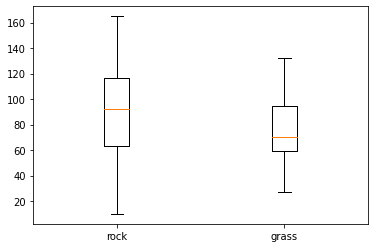

In [137]:
fig, subplot = plt.subplots()
subplot.boxplot([rock_class['Attack'],grass_class['Attack']],labels=['rock','grass'],positions=[1,2])
plt.show()

In [139]:
rock_class['Attack'].describe()

count     56.000000
mean      91.785714
std       34.805284
min       10.000000
25%       63.000000
50%       92.500000
75%      116.250000
max      165.000000
Name: Attack, dtype: float64

In [140]:
grass_class['Attack'].describe()

count     93.000000
mean      73.731183
std       24.179645
min       27.000000
25%       59.000000
50%       70.000000
75%       95.000000
max      132.000000
Name: Attack, dtype: float64

**Professor Oak is wrong. Pokémon in the grass class have a weaker regular attack than those in the rock class.**

**Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) map reduce implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories.**

In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('decathlon.ipynb').getOrCreate()

In [ ]:
pokemon = spark.read.option('inferSchema',True)\
                    .option('header',True)\
                    .csv('/content/pokemon.csv')
combats = spark.read.option('inferSchema',True)\
                    .option('header',True)\
                    .csv('/content/combats.csv')

In [ ]:
combats.withColumn('Cnt', 1)
wincount = combats.groupBy('Winner').count('Cnt')

winners = pokemon.join(wincount,pokemon.pid ==  wincount.Winner,'inner') 
row_list = winners.sort(winners.Cnt.desc()).select('Name').collect()
name_list = [row.Name for row in row_list]
name_list